<a href="https://colab.research.google.com/github/anirudh-g/Msc-Data-science/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import numpy as np
import random

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
train_dir = '/content/drive/My Drive/Colab Notebooks/Charts_5/Train'
validation_dir = '/content/drive/My Drive/Colab Notebooks/Charts_5/Validation'

In [55]:
img_width, img_height = 150, 150
nb_train_samples = 400
nb_validation_samples = 100
epochs = 30
batch_size = 16

In [56]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [57]:
def add_noise(img):
    '''Add gaussian noise to images'''
    #VARIABILITY = 50
    #deviation = VARIABILITY*random.random()
    noise_factor=0.5
    noise = noise_factor * np.random.normal(0, 255., img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [88]:
def tuple_generator(generator):
    for batch in generator:
        yield (batch, batch)

In [84]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

val_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode=None) 

validation_generator = val_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode=None)



train_datagen_noisy = ImageDataGenerator(rescale=1. / 255, preprocessing_function=add_noise)

val_datagen_noisy = ImageDataGenerator(rescale=1. / 255, preprocessing_function=add_noise) 

train_generator_noisy = train_datagen_noisy.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode=None) 

validation_generator_noisy = val_datagen_noisy.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode=None)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [85]:
sample_training_images, _ = next(train_generator_noisy)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

ValueError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


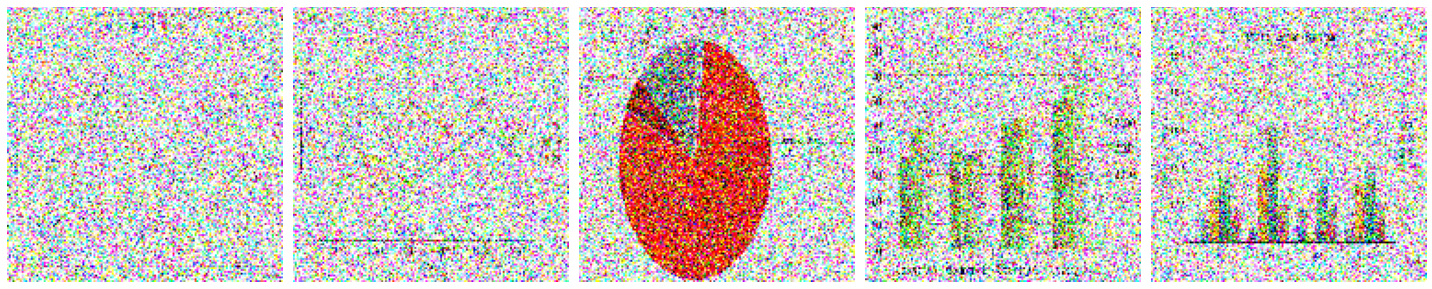

In [72]:
plotImages(sample_training_images[:5])

In [86]:
input_img = Input(shape=(img_width, img_height, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='categorical_crossentropy')

In [89]:
autoencoder.fit(tuple_generator(train_generator_noisy), tuple_generator(train_generator),
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data= tuple_generator(validation_generator_noisy))

ValueError: ignored